In [66]:
archive = "noisy_mnist_data.zip"
url = "https://cloud.tu-ilmenau.de/s/CZnESYc8eA5WDe5/download"

!wget --no-check-certificate $url -O $archive
!unzip -qd . $archive

--2025-01-21 11:50:19--  https://cloud.tu-ilmenau.de/s/CZnESYc8eA5WDe5/download
Resolving cloud.tu-ilmenau.de (cloud.tu-ilmenau.de)... 141.24.186.192
Connecting to cloud.tu-ilmenau.de (cloud.tu-ilmenau.de)|141.24.186.192|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36928386 (35M) [application/zip]
Saving to: ‘noisy_mnist_data.zip’

noisy_mnist_data.zi 100%[===================>]  35.22M  13.1MB/s    in 2.7s    

2025-01-21 11:50:24 (13.1 MB/s) - ‘noisy_mnist_data.zip’ saved [36928386/36928386]

replace ./train_data.npz? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [67]:
import numpy as np

train_data = np.load("train_data.npz")
val_data = np.load("val_data.npz")
test_data = np.load("test_data.npz")

In [54]:
X_train = train_data['noisy']
X_val = val_data['noisy']
X_test = test_data['noisy']

y_train = train_data['clean']
y_val = val_data['clean']
y_test = test_data['clean']

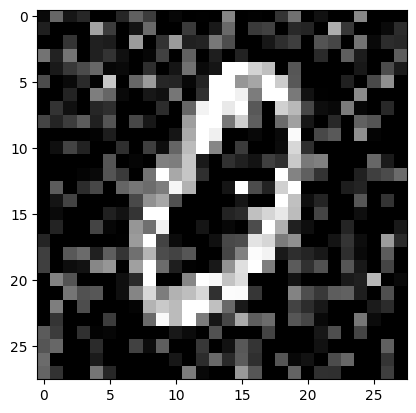

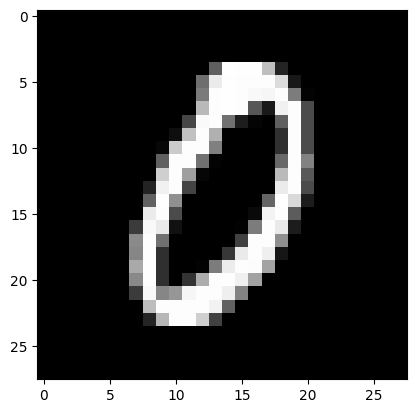

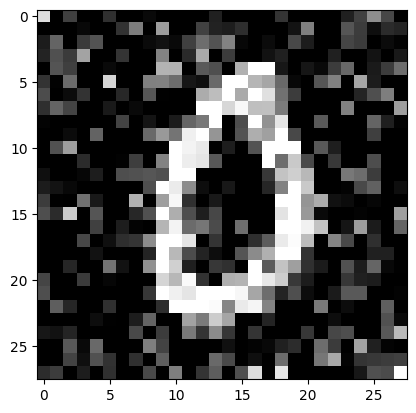

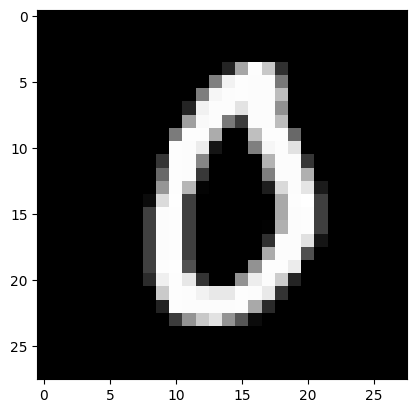

In [55]:
import matplotlib.pyplot as plt
for i in range(2):

  plt.imshow(train_data['noisy'][i]
           , cmap="gray")
  plt.show()
  plt.imshow(train_data['clean'][i]
           , cmap="gray")

  plt.show()

In [56]:
X_train.shape , y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape # this denotes that the data is already in split format

((9000, 28, 28, 1),
 (9000, 28, 28, 1),
 (900, 28, 28, 1),
 (900, 28, 28, 1),
 (100, 28, 28, 1),
 (100, 28, 28, 1))

In [57]:
import numpy as np
print(np.min(X_train), np.max(X_train))
print(np.min(X_test) , np.max(y_test))

0.0 1.0
0.0 1.0


In [58]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

## Before building our model we need to applt batch size to it.


In [59]:
train_data = tf.data.Dataset.from_tensor_slices((X_train, y_train))
val_data = tf.data.Dataset.from_tensor_slices((X_val, y_val))
test_data = tf.data.Dataset.from_tensor_slices((X_test, y_test))

train_dataset = train_data.shuffle(buffer_size=1024).batch(128)
val_dataset = val_data.batch(128)
test_dataset = test_data.batch(128)

In [94]:
# Iterate through the train dataset and print the batch size
for x_batch, y_batch in train_dataset.take(1):  # Take one batch
    print(f"X batch shape: {x_batch.shape}")
    print(f"Y batch shape: {y_batch.shape}")

    # Get batch size (the first dimension of the batch)
    print(f"Batch size: {x_batch.shape[0]}")

for x_batch, y_batch in val_dataset.take(1):  # Take one batch
    print(f"X batch shape: {x_batch.shape}")
    print(f"Y batch shape: {y_batch.shape}")
    print(f"Batch size: {x_batch.shape[0]}")

for x_batch, y_batch in test_dataset.take(1):  # Take one batch
    print(f"X batch shape: {x_batch.shape}")
    print(f"Y batch shape: {y_batch.shape}")
    print(f"Batch size: {x_batch.shape[0]}")

X batch shape: (128, 28, 28, 1)
Y batch shape: (128, 28, 28, 1)
Batch size: 128
X batch shape: (128, 28, 28, 1)
Y batch shape: (128, 28, 28, 1)
Batch size: 128
X batch shape: (100, 28, 28, 1)
Y batch shape: (100, 28, 28, 1)
Batch size: 100


In [95]:

def build_model(input_shape = (28,28,1)):

  input_img = layers.Input(shape = input_shape)

  x = layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=2)(input_img)
  x =  layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2)(x)
  x = layers.Conv2D(32, (7,7), activation='relu', padding='valid')(x)
  x = layers.Conv2DTranspose(16, (7, 7), activation='relu', padding='valid', strides=4)(x)
  x = layers.Conv2DTranspose(8, (3, 3), activation='relu', padding='same', strides=2)(x)
  x = layers.Conv2DTranspose(1, (3, 3), activation='sigmoid', padding='same', strides=2)(x)

  model = keras.Model(input_img, x)
  return model



In [96]:
my_model = build_model()

In [97]:
my_model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 14, 14, 8)           │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 7, 7, 16)            │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 1, 1, 32)            │          25,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_13                  │ (None, 7, 7, 16)            │          25,104 │
│ (Conv2DTranspose)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_14                  │ (None, 14, 14, 8)           │           1,160 │
│ (Conv2DTranspose)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_15                  │ (None, 28, 28, 1)           │              73 │
│ (Conv2DTranspose)                    │                             │                 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52,705 (205.88 KB)

 Trainable params: 52,705 (205.88 KB)

 Non-trainable params: 0 (0.00 B)

In [98]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError


my_model.compile(optimizer=Adam(learning_rate=0.001), loss=MeanSquaredError(), metrics=['mse'])

In [99]:
history = my_model.fit(train_dataset, epochs=70, validation_data=val_dataset)

Epoch 1/70
71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - loss: 0.1961 - mse: 0.1961 - val_loss: 0.0742 - val_mse: 0.0742
Epoch 2/70
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0802 - mse: 0.0802 - val_loss: 0.0718 - val_mse: 0.0718
Epoch 3/70
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0774 - mse: 0.0774 - val_loss: 0.0705 - val_mse: 0.0705
Epoch 4/70
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0756 - mse: 0.0756 - val_loss: 0.0701 - val_mse: 0.0701
Epoch 5/70
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0751 - mse: 0.0751 - val_loss: 0.0696 - val_mse: 0.0696
Epoch 6/70
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.0744 - mse: 0.0744 - val_loss: 0.0692 - val_mse: 0.0692
Epoch 7/70
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0737 - mse: 0.0737 - val_loss: 0.0683 - val_mse: 0.0683
Epoch 8/70
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0720 - mse: 0.0720 - val_loss: 0.0659 - val_mse: 0.0659
Epoch 9/70
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.067

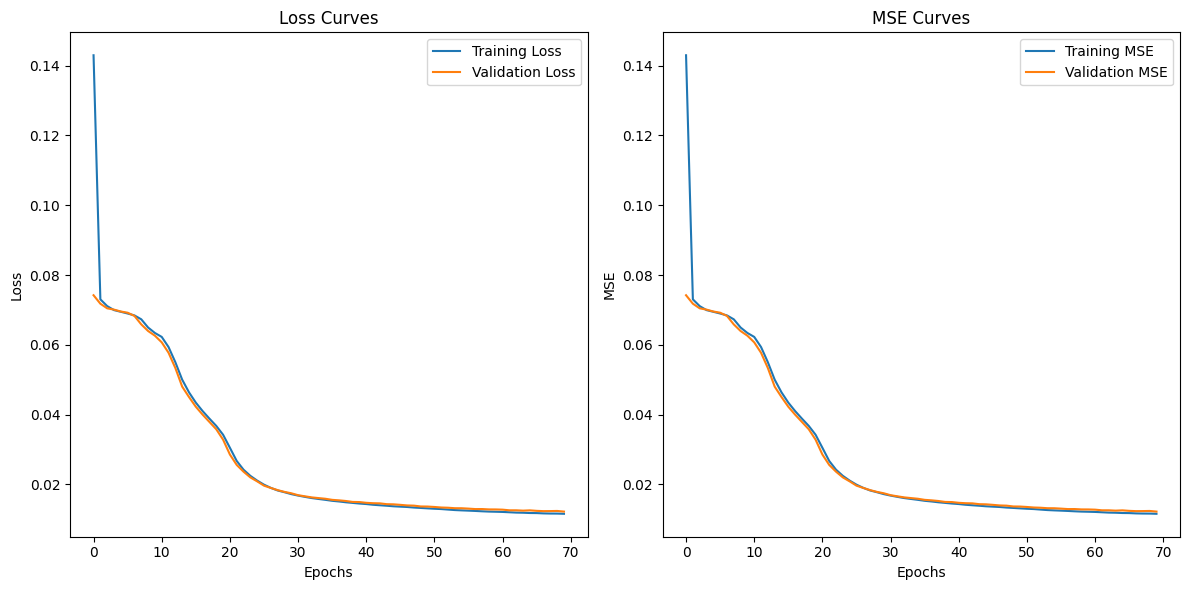

In [100]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_mse = history.history['mse']
val_mse = history.history['val_mse']

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_mse, label='Training MSE')
plt.plot(val_mse, label='Validation MSE')
plt.title('MSE Curves')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()

plt.tight_layout()
plt.show()

In [101]:
my_model.evaluate(test_dataset)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0122 - mse: 0.0122


[0.012247104197740555, 0.012247106060385704]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


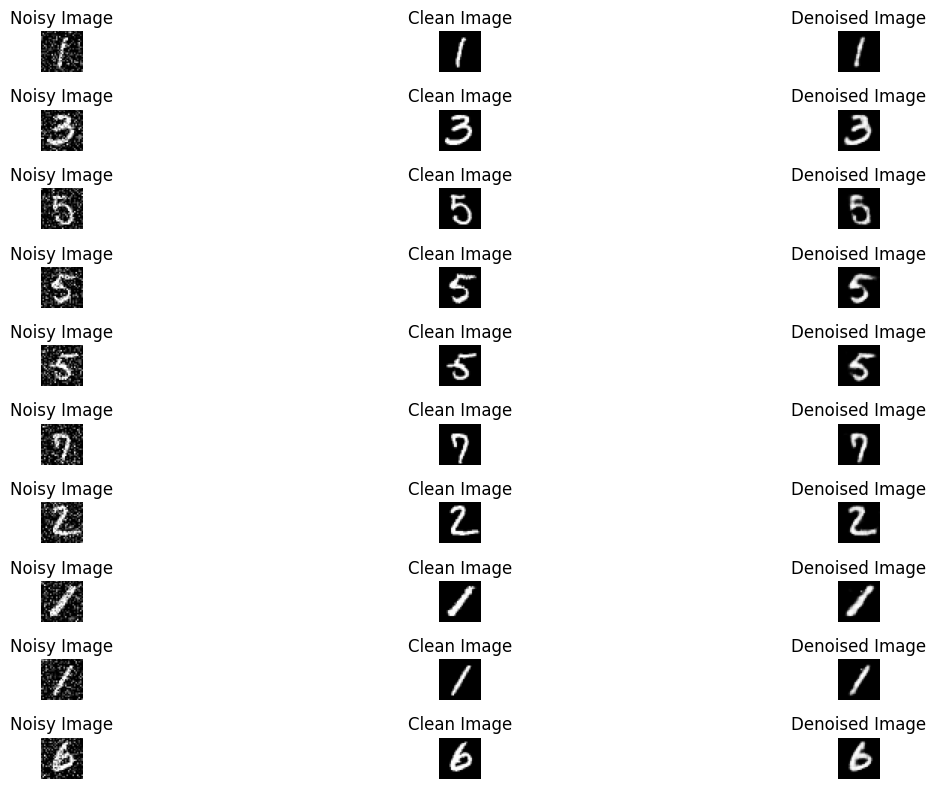

In [102]:
import matplotlib.pyplot as plt
import numpy as np

# Select 10 random indices from the test set
num_images = 10
indices = np.random.choice(X_test.shape[0], num_images, replace=False)

# Generate denoised images by predicting the noisy images
denoised_images = my_model.predict(X_test[indices])

# Plot the noisy, clean, and denoised images
plt.figure(figsize=(15, 8))

for i, idx in enumerate(indices):
    plt.subplot(num_images, 3, 3*i+1)
    plt.imshow(X_test[idx], cmap='gray')
    plt.title('Noisy Image')
    plt.axis('off')

    plt.subplot(num_images, 3, 3*i+2)
    plt.imshow(y_test[idx], cmap='gray')
    plt.title('Clean Image')
    plt.axis('off')

    plt.subplot(num_images, 3, 3*i+3)
    plt.imshow(denoised_images[i], cmap='gray')
    plt.title('Denoised Image')
    plt.axis('off')

plt.tight_layout()
plt.show()
